## How to Plot shape files using GeoPandas 

In [2]:
#read in dependencies 
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [3]:
gpd.__version__

'0.4.1'

We'll use geopandas basic dataset of continents to start.

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Geopandas as the name would suggest let's us make use of the familiar pandas library to handle our data. Many of the commands the Pandas library let's us use, is available in GeoPandas

In [5]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


Now to plot. Super easy, one liner!

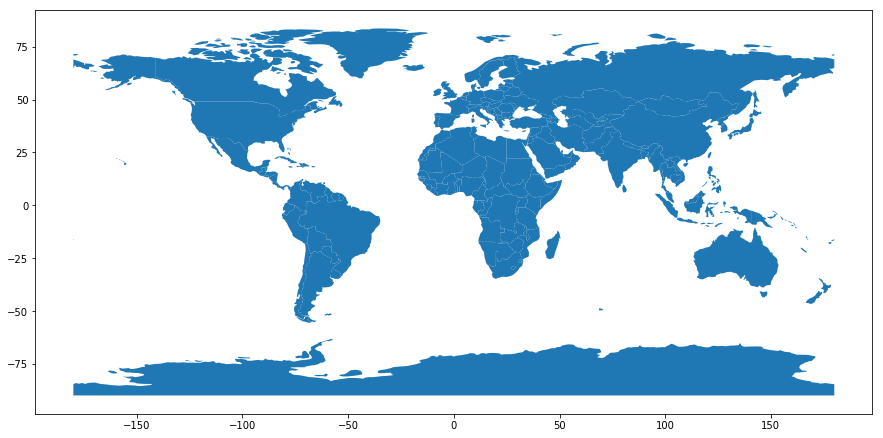

In [6]:
world.plot(figsize=(15,10))

Let's add some colour to the plot. GDP per capita based on the country would be a good start. We'll calculate that field and add it to our dataframe.

In [7]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

Now to plot. Again super simple. Define our column within the plot command.

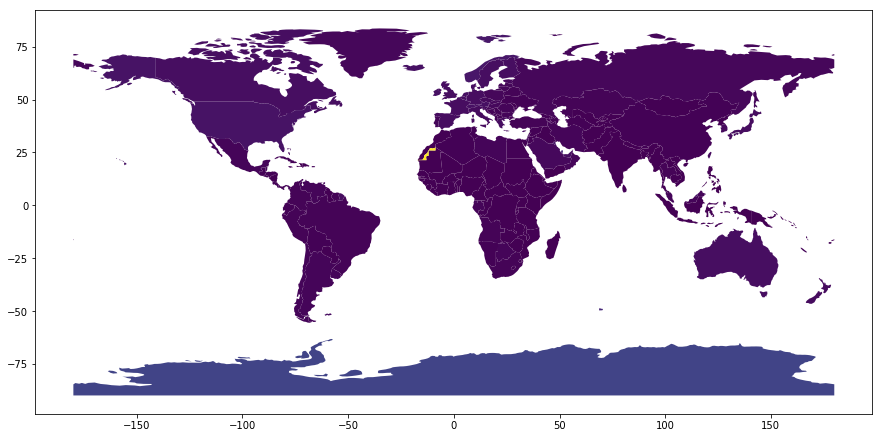

In [8]:
world.plot(column='gdp_per_cap', figsize=(15,10))

...? Our colours don't seem to be showing up as we hoped. Let's remove Antartica and any area with a low population. 

In [9]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

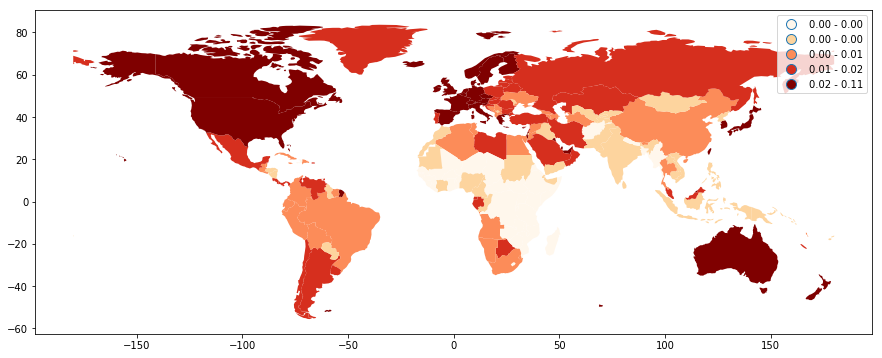

In [10]:
world.plot(column='gdp_per_cap',cmap='OrRd',scheme='quantiles', figsize=(15,10), legend = 'gdp_per_cap')

As we can see. Geopandas' plot command takes in multiple arguments, in a similar fashion to Pandas plot command. 

fyi: for the scheme argument to work, the package mapclassify might be necessary ie. pip install mapclassify

### Let's use some more local data taken from Montreal Open Data Portal
http://donnees.ville.montreal.qc.ca/

In [11]:
mtl_network = gpd.read_file("plot_geopandas/mtl_data/geobase/geobase_mtl.shp")

In [12]:
mtl_network.head()

,ID_TRC,DEB_GCH,FIN_GCH,ARR_GCH,SENS_CIR,CLASSE,LIE_VOIE,TYP_VOIE,DIR_VOIE,NOM_VOIE,DEB_DRT,FIN_DRT,ARR_DRT,LIM_GCH,LIM_DRT,geometry
0,1131001,0,0,Villeray-Saint-Michel-Parc-Extension,1.0,0.0,du,avenue,None,Parc,7091,7107,Villeray-Saint-Michel-Parc-Extension,MontrÃ©al,MontrÃ©al,"LINESTRING (295406.834 5043325.551, 295371.319..."
1,1140242,6750,6766,Rosemont-La Petite-Patrie,0.0,0.0,None,rue,None,Marconi,6795,6797,Rosemont-La Petite-Patrie,MontrÃ©al,MontrÃ©al,"LINESTRING (295793.86399932 5043438.80200472, ..."
2,1140270,0,0,Le Plateau-Mont-Royal,0.0,7.0,du,avenue,None,Parc,6201,6201,Le Plateau-Mont-Royal,MontrÃ©al,MontrÃ©al,"LINESTRING (296191.385 5042876.511, 296126.117..."
3,1141102,6956,6980,Rosemont-La Petite-Patrie,0.0,0.0,None,rue,None,Drolet,0,0,Rosemont-La Petite-Patrie,MontrÃ©al,MontrÃ©al,"LINESTRING (296050.864008362 5044025.37900752,..."
4,1141103,365,395,Rosemont-La Petite-Patrie,0.0,5.0,None,rue,None,BÃ©langer,0,0,Rosemont-La Petite-Patrie,MontrÃ©al,MontrÃ©al,"LINESTRING (295989.202008119 5044067.29899271,..."


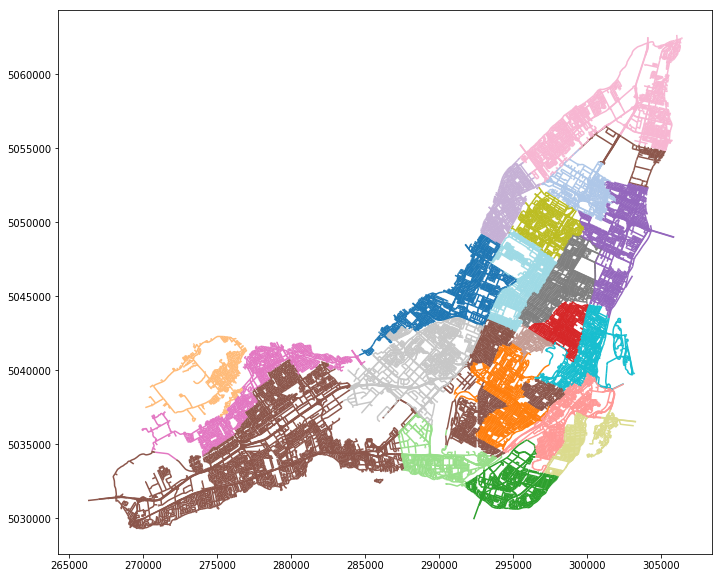

In [13]:
mtl_network.plot(column='ARR_DRT', figsize=(20,10), cmap ='tab20')

In [14]:
mtl_shape = gpd.read_file("plot_geopandas/mtl_data/Terre/terre_shp.shp")


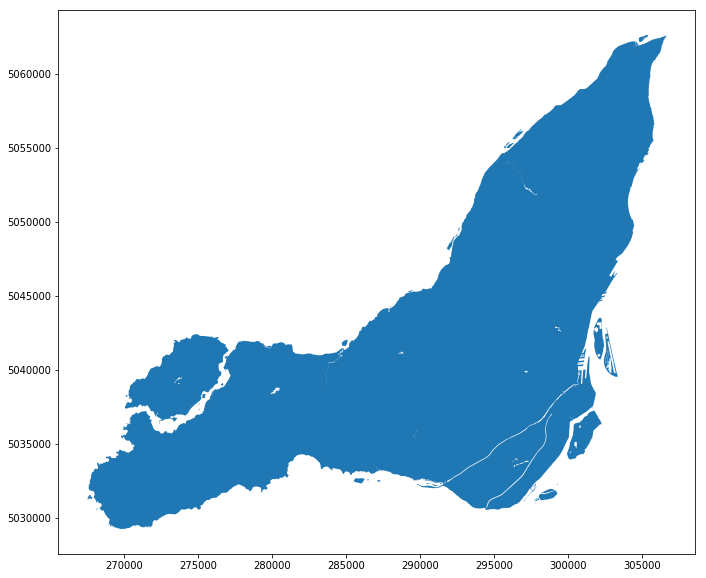

In [15]:
mtl_shape.plot(figsize=(20,10))

What if we wanted to superimpose the two maps?? 
Luckily matplotlib is here, and again, works exactly how one would expect

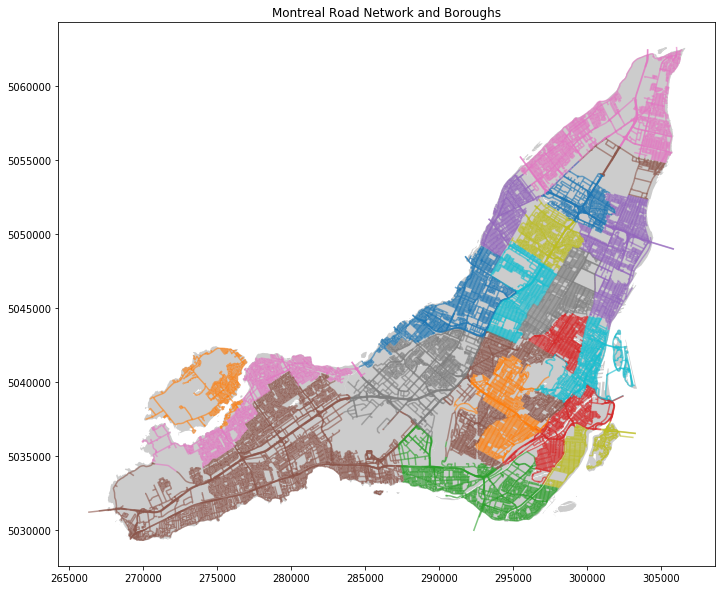

In [16]:
fig, ax = plt.subplots(figsize = (15,10))
mtl_shape.plot(ax=ax, color= 'grey', alpha=0.4)
mtl_network.plot(ax=ax, column='ARR_DRT', alpha= 0.6)
ax.set_title("Montreal Road Network and Boroughs");
